# Assignment 2

Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('imdb_data.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['sentiment'] = encoder.fit_transform(df['sentiment'])
df['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [4]:
X = df['review'].values
y = df['sentiment'].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
VOCAB_SIZE = 10000 # top 10,000 words
MAX_LEN = 200 # max number of tokens per review

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Create a Tokenizer object
# This will convert text into a format (sequences of integers) that can be used by a neural network
tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token='<OOV>')

# Fit the tokenizer on the training text data
# This builds the vocabulary: assigns an integer index to each word based on frequency
tokenizer.fit_on_texts(X_train)

# Convert the training text reviews to sequences of integers
# Each word in a review is replaced by its corresponding index from the tokenizer's vocabulary
X_train_seq = tokenizer.texts_to_sequences(X_train)

# Similarly, convert the test text reviews to sequences of integers
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the training sequences so that all sequences are of equal length
# - maxlen: maximum length of sequences after padding/truncating
# - padding="post": pads zeros at the end of each sequence
# - truncating="post": truncates extra words from the end if a sequence is too long
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding="post", truncating="post")

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# Create a sequential model — layers added one after another
model = Sequential()

# Embedding layer:
# - input_dim: size of the vocabulary (total unique words, e.g., 10,000)
# - output_dim: size of the dense embedding vector for each word (e.g., 64-dimensional)
# - input_length: length of input sequences (after padding)
# This layer turns each integer (word index) into a learnable dense vector
model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=64, input_length=MAX_LEN))

# Flatten layer:
# - Converts the 2D output from the Embedding layer (MAX_LEN x 64) into a 1D vector
# - This is needed before passing it to Dense layers
model.add(Flatten())

# First dense (fully connected) hidden layer:
# - 64 neurons
# - ReLU activation helps the network learn non-linear patterns
model.add(Dense(64, activation='relu'))

# Output layer:
# - 1 neuron since this is binary classification (positive vs negative review)
# - Sigmoid activation outputs a probability between 0 and 1
model.add(Dense(1, activation='sigmoid'))

# Compile the model:
# - 'adam' is an efficient optimizer for training
# - 'binary_crossentropy' is the appropriate loss function for binary classification
# - 'accuracy' tracks how many predictions are correct
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# train the model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,# train the model y_train,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7040 - loss: 0.5251 - val_accuracy: 0.8620 - val_loss: 0.3209
Epoch 2/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9588 - loss: 0.1185 - val_accuracy: 0.8317 - val_loss: 0.4789
Epoch 3/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9955 - loss: 0.0166 - val_accuracy: 0.8426 - val_loss: 0.6429
Epoch 4/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.8380 - val_loss: 0.7703
Epoch 5/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 1.0000 - loss: 5.4512e-04 - val_accuracy: 0.8411 - val_loss: 0.8435
Epoch 6/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 1.0000 - loss: 1.3137e-04 - val_accuracy: 0.8440 - val_loss: 0.8613
Epoch 7/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 1.0000 - loss: 4.1158e-05 - val_accuracy: 0.8451 - val_loss: 0.8905
Epoch 8/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 1.0000 - loss: 1.8744e-05 - 

In [20]:
# evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=1)
print('Test Accuracy: ', accuracy)
print('Test Loss: ', loss)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8423 - loss: 1.0066
Test Accuracy:  0.8450666666030884
Test Loss:  1.0001640319824219


In [21]:
# get predicted probabilities and convert to binary labels
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step


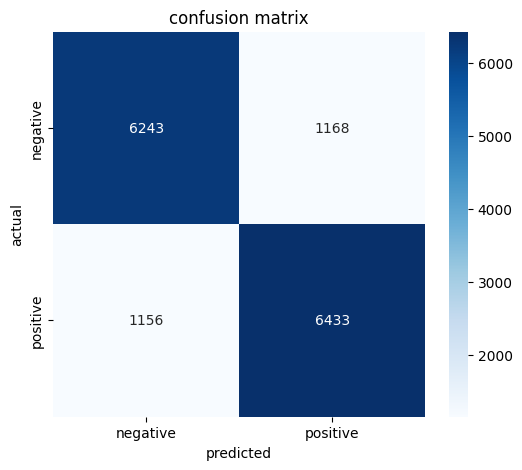

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

In [23]:
# classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.84      0.84      7411
    positive       0.85      0.85      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

